In [66]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

import datetime as dt

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np



In [67]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [68]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [69]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [70]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['Measurement', 'Station']

In [71]:
# Assign the Measurement class, Station class to a variables called Measurement and Station respectively
Measurement = Base.classes.Measurement
Station = Base.classes.Station

In [72]:
# Create a session
session = Session(engine)

In [73]:
# Last Observation date in the measurement table
LastObservationdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastDatestr = str(LastObservationdate[0])
LastDate = dt.datetime.strptime(lastDatestr, '%Y-%m-%d')

#A date one year ago
DateOneYearAgo = LastDate - dt.timedelta(days=365)
DateOneYearAgo = dt.datetime.strftime(DateOneYearAgo, '%Y-%m-%d')

print(DateOneYearAgo)

2016-08-23


In [97]:
# Precipitation Analysis for the last 12 months
precipitationResults = session.query(Measurement.date , Measurement.prcp).filter(Measurement.date >= DateOneYearAgo).all()
precipitationDf = pd.DataFrame(precipitationResults)
precipitationDf = precipitationDf[['date','prcp']]
#precipitationDf.drop(index, inplace=True)
precipitationDf.set_index('date', inplace = True)
precipitationDf.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [98]:
precipitationDf.index


Index(['2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26', '2016-08-27',
       '2016-08-28', '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01',
       ...
       '2017-08-10', '2017-08-12', '2017-08-14', '2017-08-15', '2017-08-16',
       '2017-08-17', '2017-08-19', '2017-08-21', '2017-08-22', '2017-08-23'],
      dtype='object', name='date', length=2021)

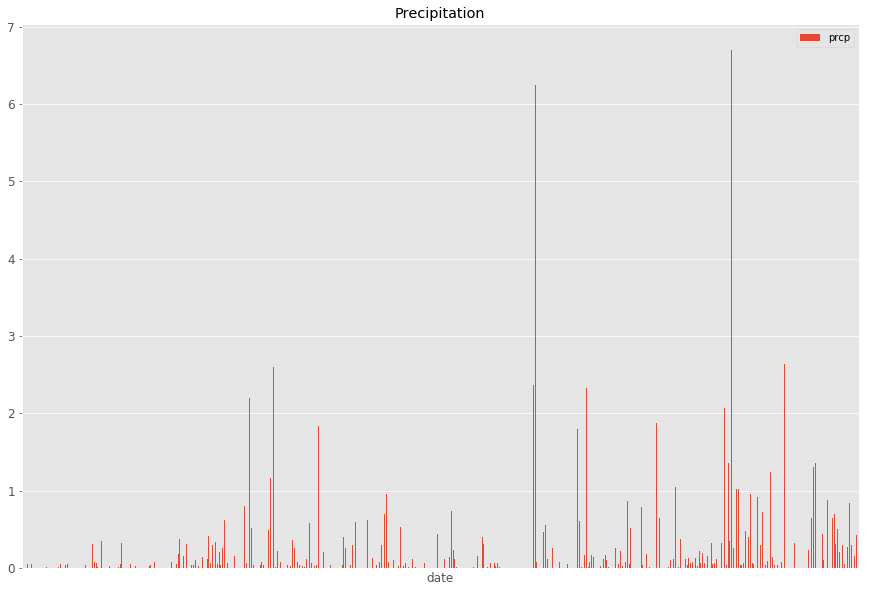

In [115]:

import matplotlib.dates as mdates
%matplotlib inline

ax.set_xticks(np.arange(4))

ax = precipitationDf.plot(kind='bar', title ="Precipitation",figsize=(15,10),legend=True, fontsize=12)


#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))




In [116]:
precipitationDf.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
#Station Analysis
Statios = session.query(Measurement.date , Measurement.prcp).filter(Measurement.date >= DateOneYearAgo).all()